# NZMSA Phase I - AI and ML notebook
### By Kyle Hall

In this notebook, we will be analysing house prices gathered from Sindian Dist., New Taipei City, Taiwan to attempt to predict the price of a house using the variables established in the dataset. The data has been used from the UCI Machine Learning Repository.

We are defining the house price in terms of unit area, and this uses a local measurement called a Ping, where 1 Ping is approximately 3.3 metres squared.  House prices have been measured in 10000 New Taiwan Dollars/Ping.

The term MRT station refers to 'Mass Rapid Transit' - a subway system.

The analysis will be performed as follows
1. The data will be cleaned, removing any null values and unnecessary columns
2. The data will be visualised for analysis, looking for general relationships and correlations between variables
3. Finally, machine learning models will be applied and compared to one another, to evaluate the performance of the models

To begin, we must import the data, and we will also import the libraries necessary for our data cleaning and visualisation:

In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32717  100 32717    0     0  82203      0 --:--:-- --:--:-- --:--:-- 84105


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_excel('Real%20estate%20valuation%20data%20set.xlsx', names = ['Number', 'Transaction Date', 'House Age', 'Distance to Nearest MRT Station', 'Number of Nearby Convenience Stores','Latitude', 'Longitude', 'House Price of Unit Area'])

In [4]:
dataset.head()

,Number,Transaction Date,House Age,Distance to Nearest MRT Station,Number of Nearby Convenience Stores,Latitude,Longitude,House Price of Unit Area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Note: The Transaction Date parameter is represented as a float, where each year is segmented into 1/12 parts -  so 2013.500 represents June 2013. House Age is represented in years, and the Distance to Nearest MRT Station is measured in metres. Latitude and Longitude are both represented in degrees, and the House Price of Unit Area has been explained above in the introduction

The Number of Nearby Convenience stores has been defined as the number of stores reachable in the 'living circle,' where they can be easily reached on foot.

We see there are 8 variables and 414 entries in the data:

In [5]:
dataset.shape

(414, 8)

Now that we have imported the data, we will proceed to clean the data.
To begin, we will check if there are any null values in the dataset - these cannot be analysed or replaced, so they will have to be removed from the DataFrame if they happen to appear

In [6]:
dataset.isnull().values.any()

False

From observing the the first five rows of the DataFrame, we see that the Number column simply corresponds to the numerical order that the houses are listed in - there is no predictive capacity and it is essentially the same as the row index + 1. So we will remove this column as it serves no purpose for our analysis.

In [7]:
dataset = dataset.drop(['Number'], axis=1)

Now we know there all at no null values and we've removed an unnecessary column. However, in order to analyse the data, we should be sure about the data types we are dealing with, specifically, we require numerical inputs to our models and as such, we need to ensure that we are dealing with numerical data types before we can proceed

In [8]:
dataset.dtypes

Transaction Date                       float64
House Age                              float64
Distance to Nearest MRT Station        float64
Number of Nearby Convenience Stores      int64
Latitude                               float64
Longitude                              float64
House Price of Unit Area               float64
dtype: object

All the values are of a numerical type and we have cleaned the data - the DataFrame is ready and we can continue with our visualisation and analysis.

Let's begin by considering a summary of the data using pandas .describe(), and create histograms to visualise the data as a whole.

In [9]:
dataset.describe()

,Transaction Date,House Age,Distance to Nearest MRT Station,Number of Nearby Convenience Stores,Latitude,Longitude,House Price of Unit Area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2d38d0588>,
      dtype=object)

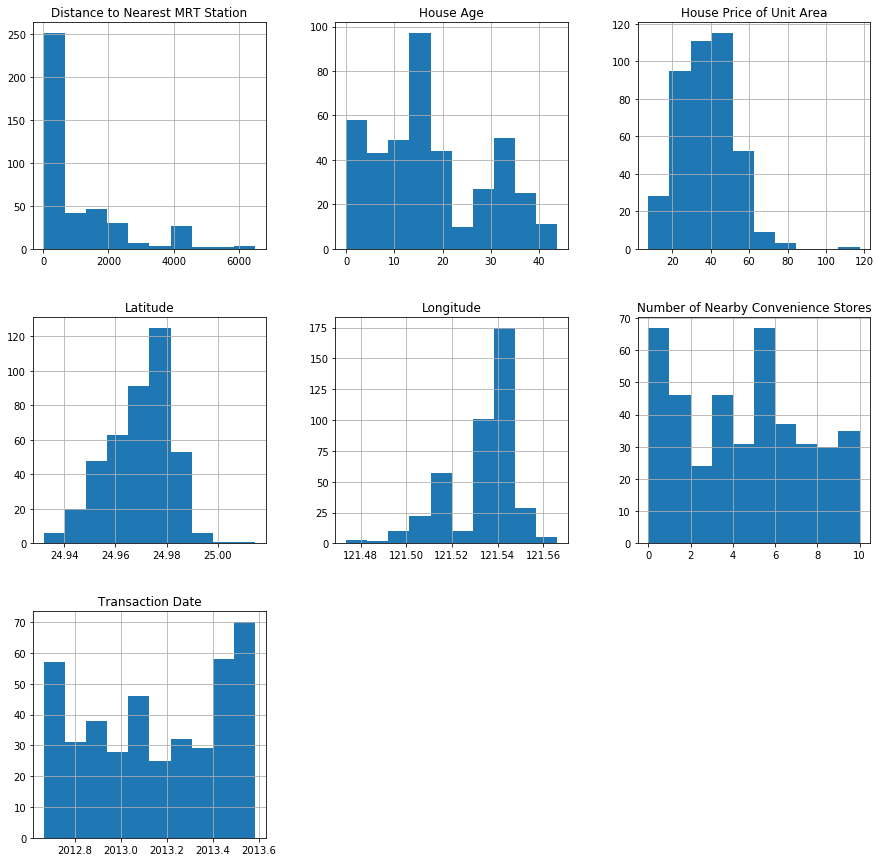

In [10]:
dataset.hist(figsize=(15,15))

House Price per Unit Area appears right skewed, and the Distance to Nearest MRT Station shows right skew as well. Latitude and Longitude both appear to be left skewed.

We'll now use the Seaborn function pairplot() to consider general relationships between the variables: 

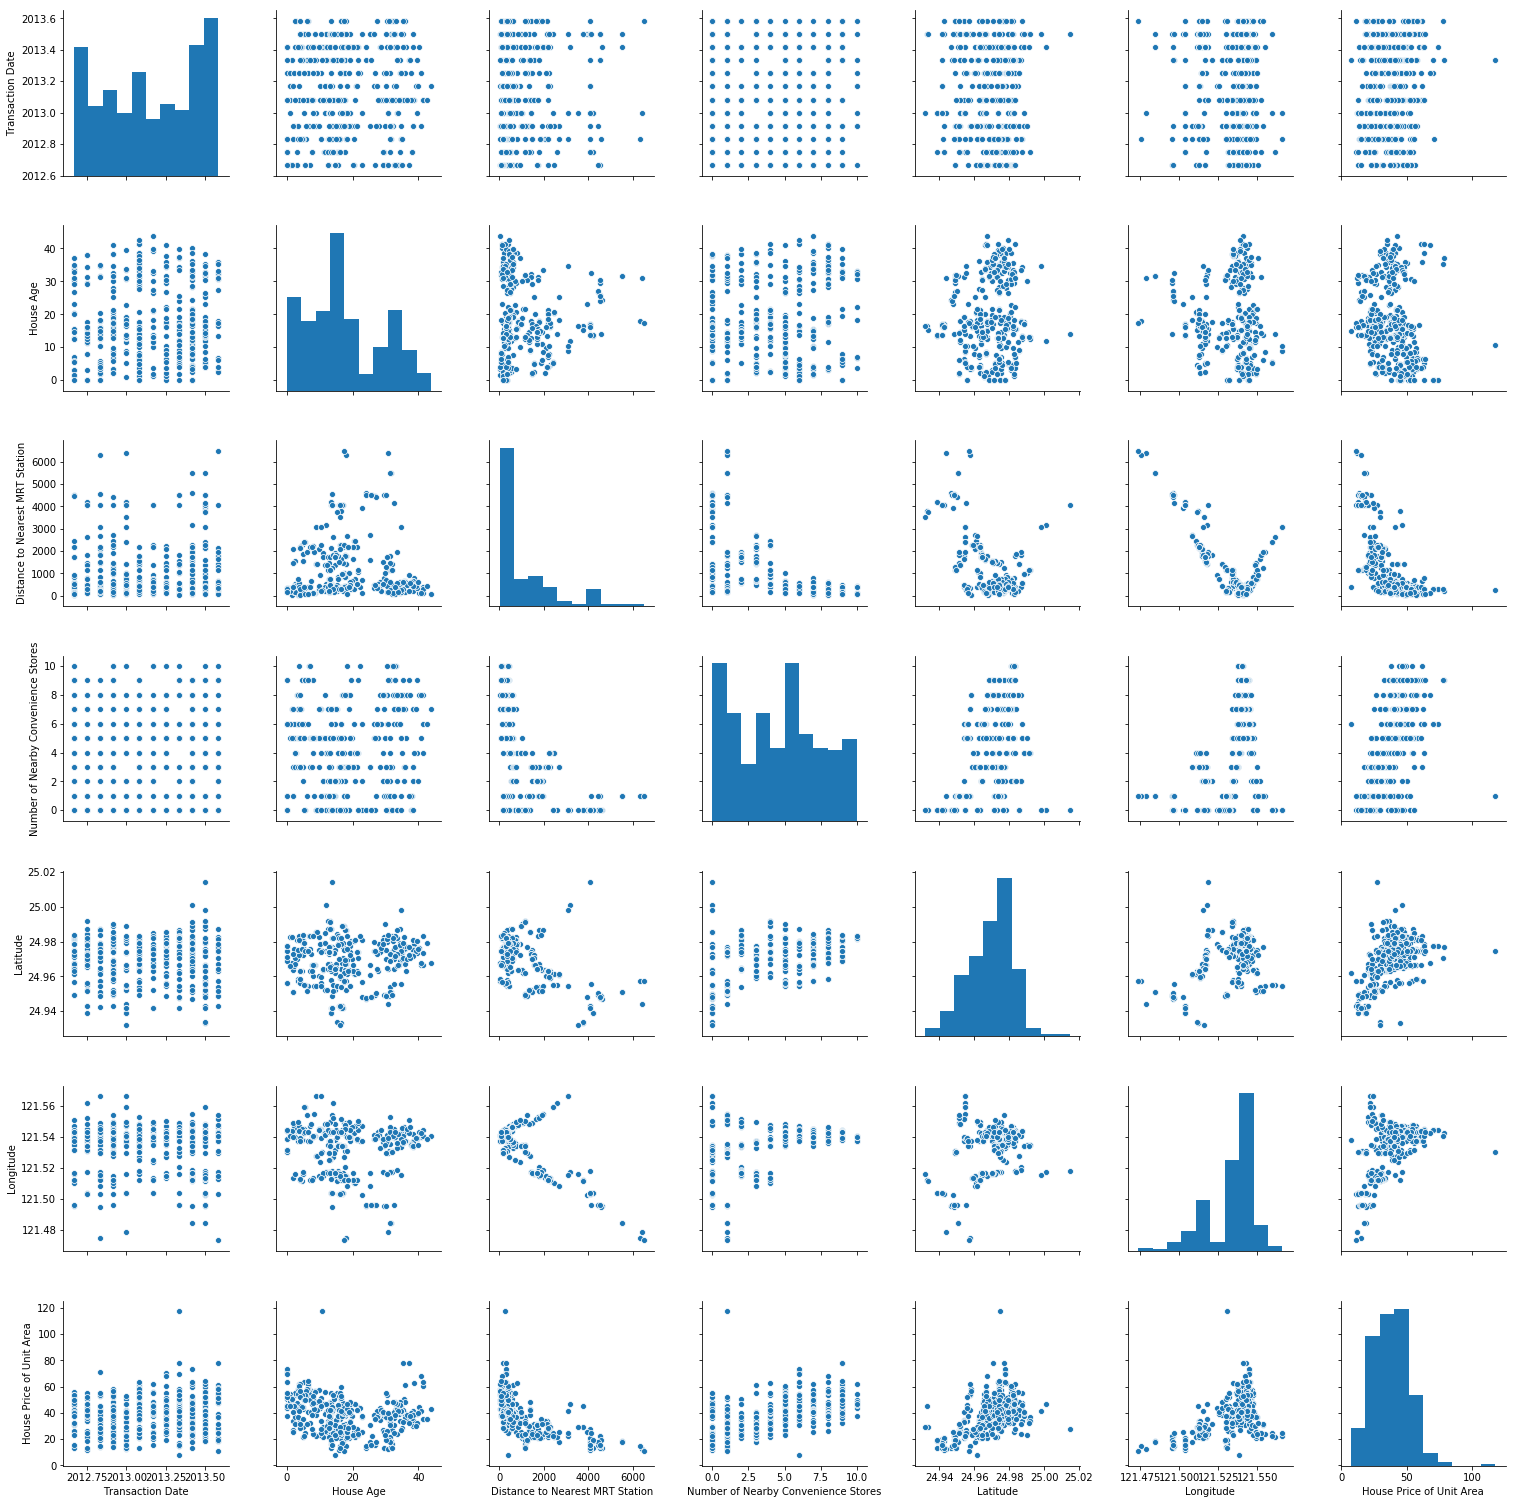

In [11]:
sns.pairplot(dataset, height = 3)

Somewhat strangely, older houses appear to be almost as expensive as newer ones, but there does appear to be a slight negative correlation overall. Transaction Date doesn't appear to have a large effect on House Price per Unit Area through the years we have observed, and there is a slight positive correlation between the Number of Nearby Convenience Stores and the House Price per Unit Area - Latitiude and Longitude appear to be positively correlated as well. We also see a negative correlation between Distance to Nearest MRT Station and the House Price per Unit Area.

To quantify these correlations, we can use the panads .corr() function to create a correlation matrix and then use the Seaborn heatmap() function to visualise these correlations in a more intuitive manner:

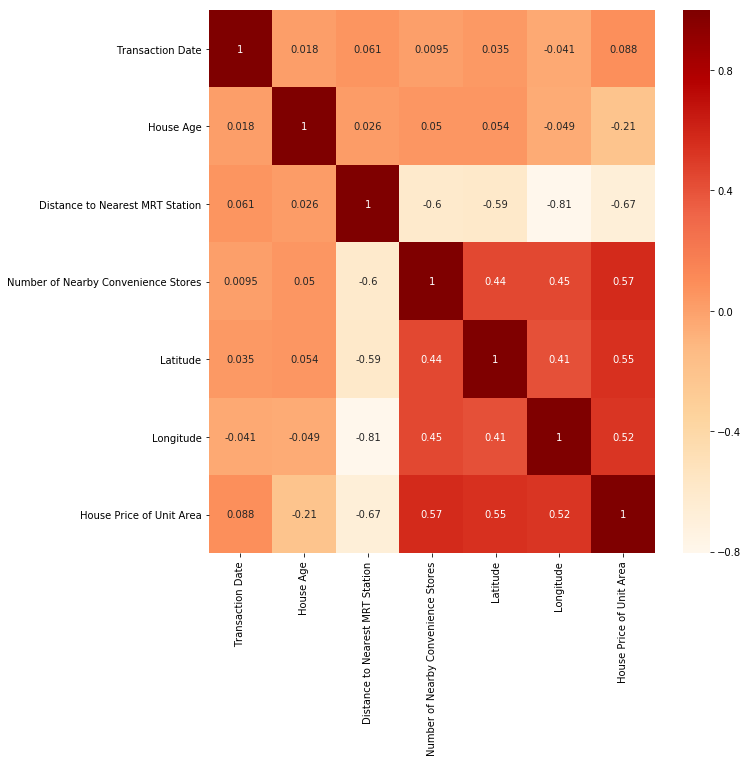

In [12]:
axes, figures = plt.subplots(figsize = (10,10))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'OrRd')
plt.show()

We can observe that Distance to Nearest MRT Station demonstrates the strongest negative correlation with respect to House Price of Unit Area, and Latitude, Longitude and Number of Nearby Convenience stores all have positive correlations that are similar to one another. Transaction Date and House Age don't appear to have particularly strong correlations with House Price of Unit Area.

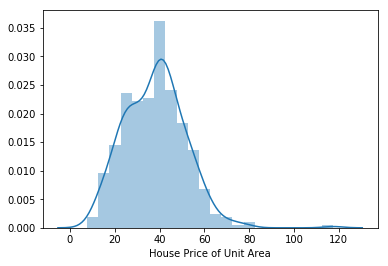

In [39]:
sns.distplot(dataset[('House Price of Unit Area')]) #Observing the distribution House Price of unit area before we begin constructing our model

We will now begin fitting our model. To start, we will split the data into a training set and test set, selecting a 80/20 split. We must also split the DataFrame into 2 groups, one of the groups will just be the House Price of Unit Area column  - this is what we wish to predict, the 'answers' of our model, we will denote this as $y$. The rest of the data will be referred to as $x$, and we wish to use these columns and the variables they represent in order to predict $y$ by constructing a model. We will use the data from the training set to construct the model, and then use the data from the test set to evaluate the predictive capabilities of the model.

In [14]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['House Price of Unit Area'], axis = 1)
y = dataset['House Price of Unit Area']

In [15]:
x.head() #Verifying the column has been removed

,Transaction Date,House Age,Distance to Nearest MRT Station,Number of Nearby Convenience Stores,Latitude,Longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245


In [16]:
y.head() #Verifying we have selected the correct column so we will get the correct output

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House Price of Unit Area, dtype: float64

In [17]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 20) #random_state sets the seed for the RNG, and shuffle = True by default, shuffling before splitting

Now that we have split our data into a training set and a test set, we can feed the training set into a number of suitable machine learning algorithms to generate a model. Given that we are dealing with continuous numerical variables, this is a regression problem - we will start by using a Linear Regression model.  We are fitting a model that corresponds to $y = m_1x_1 + m_2x_2 + ...$ where $m_1$ is the coefficient of generated by the first variable, Transaction Date, $m_2$ is the coefficient generated by the second variable, House Age and so on.

Importing an implementation of relevant model from the scikit-learn library:

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(train_x, train_y) #Using our training set to fit the Linear Regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
model.coef_ #This displays the coefficients produced for each of the 6 variables of the model

array([ 5.29352800e+00, -2.91926063e-01, -4.36044072e-03,  1.19570976e+00,
        2.20522175e+02, -2.29868322e+01])

With our model created, now we can use our test set to evaluate the effectiveness of the predictions on data that the model hasn't seen before:

In [21]:
predicted_values = model.predict(test_x)

Text(0, 0.5, 'Predicted House Price of Unit Area')

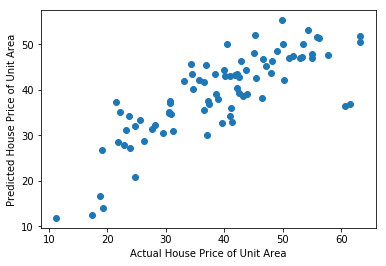

In [22]:
plt.scatter(test_y, predicted_values)
plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')

In [23]:
model.score(test_x,test_y)

0.6481421203733089

This measurement is the $R^2$ value of the model - the coefficient of determination. It is a measure of the goodness of fit and represents how well the predictions from the model fit the data points it was tested on, the test set. It measures the amount of variation the model can explain.

If we  wanted to use this model, we can input values for each variable and get an estimate how expensive per unit area it might be. For instance, a house that sold in July 2013, is 5 years old, 800 metres away from nearest MRT station, has 3 nearby convenience stores and is at $24.95^{\circ}$ latitude and $121.5^{\circ}$ longitude:

In [24]:
model.predict([[2013.5, 5, 800, 3, 24.95, 121.5]])

array([40.04548582])

So we would estimate a house with these parameters to be cost around 40 units, and given the units are 10000 New Taiwan Dollars/Ping, this would be around 400000 New Taiwan Dollars/Ping.

Given that this Linear Regression model didn't have a particularly high $R^2$ value, perhaps there's another model may fit the data better. A model that can be used for regression problems is a ensemble learning method called the Random Forest algorithm.
It works by creating multiple decision trees and then evaluating the mean prediction across these trees, an individual tree leads to overfitting, but by constructing many trees (a forest) then this helps to correct the prediction.

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
model2 = RandomForestRegressor(n_estimators = 25, random_state = 20) #n_estimators defines how many trees to build, random_state is same as in LinearRegression

In [27]:
model2.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [28]:
predicted_values2 = model2.predict(test_x)

Text(0, 0.5, 'Predicted House Price of Unit Area')

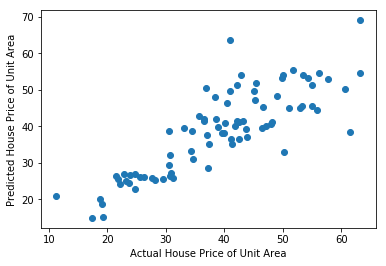

In [29]:
plt.scatter(test_y, predicted_values2)
plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')

In [30]:
model2.score(test_x, test_y)

0.6859986184188442

We do see an 'improvement' here with respect to the $R^2$ value, representing a slight better fit of this model to the data compared with the original Linear Regression model. However, this only used 25 decision trees, if we increase the number of trees, we may be able to increase the $R^2$ value further:

Text(0, 0.5, 'Predicted House Price of unit area')

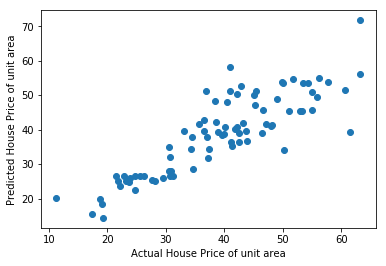

In [31]:
model3 = RandomForestRegressor(n_estimators = 1000, random_state = 20) #Now using 1000 decision trees in the forest
model3.fit(train_x, train_y)
predicted_values3 = model3.predict(test_x)
plt.scatter(test_y, predicted_values3)
plt.xlabel('Actual House Price of unit area')
plt.ylabel('Predicted House Price of unit area')

In [32]:
model3.score(test_x, test_y)

0.7292981615321388

In [33]:
model3.predict([[2013.5, 5, 800, 3, 24.95, 121.5]])

array([44.81208167])

We see a reasonably significant increase in the $R^2$ value of this Random Forest model compared to the Linear Regression model, and we can also see there is a difference in the prediction for this value compared to the Linear Regression model. Also, note the y-axis of this scatter plot compared to the one generated for the Linear Regression model - there are significant differences in the predicted values at the low and high ends of the actual tested values.

To further compare the models, we can use the Mean Absolute Error (MAE), a simple metric for measuring regression error:

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
MAE1 = mean_absolute_error(test_y, predicted_values) #Finding MAE for the Linear Regression model
MAE3 = mean_absolute_error(test_y, predicted_values3) #Finding MAE for the Random Forest model with 1000 trees

In [36]:
print("MAE of the Linear Regression model: " + str(MAE1) + "\nMAE of the Random Forest model: " + str(MAE3))

MAE of the Linear Regression model: 5.465733013826369
MAE of the Random Forest model: 4.746006758462447


We see the MAE of the Random Forest model is slightly smaller than the MAE of the Linear Regression model. Based on the $R^2$ value and the MAE, this suggests that the Random Forest model may be a better fit for the data.

However, to conclusively determine which model should be used we would likely need to consider the potential practical purposes of the model - there are larger differences at the either extremes compared to the houses that are in the middle of the range, so what kind of house prices are being predicted might change which model you would want to use. 

To conclude:

We have analysed Taiwanese house prices by first cleaning the data by checking for null values and removing an unnecessary column, then the data was analysed by visualising it using histograms and scatter plots with the intention of looking for general relationships and correlations. Two different machine learning models were applied to this regression problem in order to make predictions about the house prices - a Linear Regression model and a Random Forest model. They were compared by analysing the $R^2$ value as well as another metric: the Mean Absolute Error. 